In [7]:
import numpy as np
import math
import matplotlib.pyplot as mplt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def rotation(point,angle):
    a = np.cos(angle)
    b = np.sin(angle)
    r = np.array([[a,-b,0],[b,a,0],[0,0,1]])
    point_ordered = point.transpose()
    point_rotated = r.dot(point_ordered)
    return point_rotated

In [9]:
def translate(point,x,y,z):
    one = np.array([[1,1,1,1,1,1,1,1]])
    point_ext = np.concatenate((point,one.T),axis = 1)
    point_sorted = point_ext.transpose()
    t = np.array([[1,0,0,x],[0,1,0,y],[0,0,1,z],[0,0,0,1]])
    point_translated = t.dot(point_sorted)
    return point_translated

In [10]:
def both(point,axis,angle,Tx,Ty,Tz):
    a  = np.cos(angle)
    b  = np.sin(angle)
    if axis=='z':
        t = np.array([[a,-b,0,Tx],[b,a,0,Ty],[0,0,1,Tz],[0,0,0,1]])
    if axis=='x':
        t = np.array([[1,0,0,Tx],[0,a,-b,Ty],[0,b,a,Tz],[0,0,0,1]])
    if axis=='y':
        t = np.array([[a,0,b,Tx],[0,1,0,Ty],[-b,0,a,Tz],[0,0,0,1]])
    one = np.array([[1,1,1,1,1,1,1,1]])
    point_full = np.concatenate((point,one.T),axis = 1)
    point_final = point_full.transpose()
    point_both = t.dot(point_final)
    return point_both

In [15]:
points = np.array([[0,0,0],[1,0,0],[1,1,0],[0,1,0],[0,0,1],[1,0,1],[1,1,1],[0,1,1]])
angle  = 2*math.pi/3
result = rotation(points,angle)
result_t = translate(points,1,1,1)
result_both = both(points,'z',angle,1,1,1)
points_r = result.transpose()
points_t = result_t.transpose()
points_both = result_both.transpose()
print(points_r)
print(points_t)
print(points_both)
line   = points[0:2]
line_r = points_r[0:2]
line_t = points_t[0:2]
line_both = points_both[0:2]
l   = line.transpose()
l_r = line_r.transpose()
l_t = line_t.transpose()
l_both = line_both.transpose()

[[ 0.         0.         0.       ]
 [-0.5        0.8660254  0.       ]
 [-1.3660254  0.3660254  0.       ]
 [-0.8660254 -0.5        0.       ]
 [ 0.         0.         1.       ]
 [-0.5        0.8660254  1.       ]
 [-1.3660254  0.3660254  1.       ]
 [-0.8660254 -0.5        1.       ]]
[[1 1 1 1]
 [2 1 1 1]
 [2 2 1 1]
 [1 2 1 1]
 [1 1 2 1]
 [2 1 2 1]
 [2 2 2 1]
 [1 2 2 1]]
[[ 1.         1.         1.         1.       ]
 [ 0.5        1.8660254  1.         1.       ]
 [-0.3660254  1.3660254  1.         1.       ]
 [ 0.1339746  0.5        1.         1.       ]
 [ 1.         1.         2.         1.       ]
 [ 0.5        1.8660254  2.         1.       ]
 [-0.3660254  1.3660254  2.         1.       ]
 [ 0.1339746  0.5        2.         1.       ]]


True

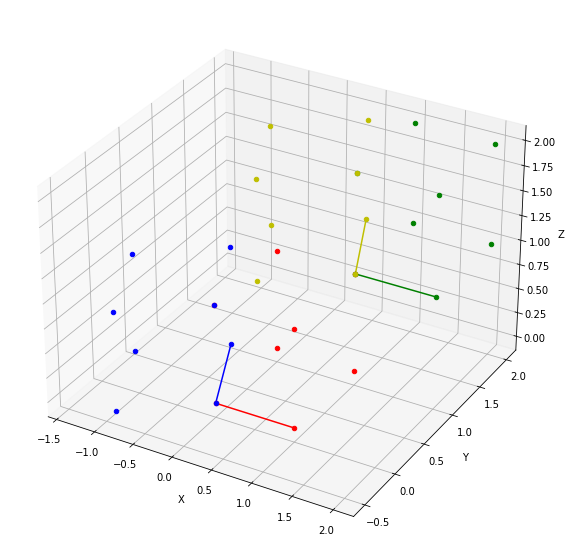

In [16]:
fig = mplt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

for x in points:
    ax.scatter(x[0],x[1],x[2],c='r')
for x in points_r:
    ax.scatter(x[0],x[1],x[2],c='b')
for x in points_t:
    ax.scatter(x[0],x[1],x[2],c='g')
for x in points_both:
    ax.scatter(x[0],x[1],x[2],c='y')
    
figure = ax.plot(l[0],l[1],l[2], c='r')
figure = ax.plot(l_r[0],l_r[1],l_r[2], c='b')
figure = ax.plot(l_t[0],l_t[1],l_t[2], c='g')
figure = ax.plot(l_both[0],l_both[1],l_both[2], c='y')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
mplt.isinteractive()